<p align="center">
  <a href="url"><img src="https://raw.githubusercontent.com/mymehio/test/master/ml4co-final.png" align="middle" height="350" width="600" ></a>
</p>

#An Image Classifier using Fully-Connected and Convolutional Neural Networks


In this project, you will train a **fully-connected neural network** to perform image classification on dandelions and grass plants, and you will do the same task bu this time using a **convolutional neural network**, and then compare between their performances.
You will be using TensorFlow/Keras to build these models training/validation dataset.

First, let's download the training and validation data:

### Preparing the Datasets

In [1]:
!pip install mlflow
!pip install wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00


In [2]:
import mlflow
import wandb


In [3]:
mlflow.set_tracking_uri("file:///content/mlruns")  # Local storage
mlflow.set_experiment("my_experiment")

with mlflow.start_run():
    mlflow.log_param("learning_rate", 0.001)
    mlflow.log_metric("accuracy", 0.9)
    mlflow.log_artifact("Brain Stroke Prediction")  # Save models, datasets, etc.


2025/04/24 13:30:06 INFO mlflow.tracking.fluent: Experiment with name 'my_experiment' does not exist. Creating a new experiment.


FileNotFoundError: [Errno 2] No such file or directory: 'Brain Stroke Prediction'

In [5]:
!wget --no-check-certificate \
    https://github.com/mymehio/test/blob/master/train.zip?raw=true \
    -O /tmp/train.zip

--2025-04-24 13:31:20--  https://github.com/mymehio/test/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mymehio/test/raw/refs/heads/master/train.zip [following]
--2025-04-24 13:31:20--  https://github.com/mymehio/test/raw/refs/heads/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mymehio/test/refs/heads/master/train.zip [following]
--2025-04-24 13:31:20--  https://raw.githubusercontent.com/mymehio/test/refs/heads/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [6]:
!wget --no-check-certificate \
    https://github.com/mymehio/test/blob/master/valid.zip?raw=true \
    -O /tmp/valid.zip

--2025-04-24 13:31:21--  https://github.com/mymehio/test/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mymehio/test/raw/refs/heads/master/valid.zip [following]
--2025-04-24 13:31:21--  https://github.com/mymehio/test/raw/refs/heads/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mymehio/test/refs/heads/master/valid.zip [following]
--2025-04-24 13:31:22--  https://raw.githubusercontent.com/mymehio/test/refs/heads/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data.

In [7]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

The contents of the .zip are extracted to the directory `/tmp/train`, which in turn each contain `dandelion` and `grass` subdirectories.



What you'll see later on is that you will use the [ImageGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class to automatically make our dataset ready from this train directory, using the subdirectories for classes.

Let's define each of these subdirectories:

In [8]:
# Directory with our training dandelion images
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory with our training grass images
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory with our validation dandelion images
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory with our validation grass images
valid_grass_dir = os.path.join('/tmp/valid/grass')

Now, let's see what the filenames look like in the `dandelion` and `grass` training directories:

In [9]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_names = os.listdir(valid_dandelion_dir)
print(validation_dandelion_names[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000277.jpg', '00000369.jpg', '00000173.jpg', '00000015.jpg', '00000232.jpg', '00000261.jpg', '00000162.jpg', '00000164.jpg', '00000019.jpg', '00000372.jpg']
['00000277.jpg', '00000369.jpg', '00000173.jpg', '00000015.jpg', '00000232.jpg', '00000261.jpg', '00000162.jpg', '00000164.jpg', '00000019.jpg', '00000372.jpg']
['00000015.jpg', '00000019.jpg', '00000011.jpg', '00000018.jpg', '00000056.jpg', '00000063.jpg', '00000086.jpg', '00000016.jpg', '00000010.jpg', '00000013.jpg']
['00000015.jpg', '00000019.jpg', '00000011.jpg', '00000018.jpg', '00000056.jpg', '00000016.jpg', '00000010.jpg', '00000013.jpg', '00000036.jpg', '00000025.jpg']


Let's find out the total number of dandelion and grass images in the directories:

**Exercise:**
To count the number of samples, as they are now contained inside a directory you may get benifit from these functions: len, listdir from os lib:
i.e. ` len(os.listdir(directory))`

In [10]:
# complete your code below
print('total training dandelion images:', len(train_dandelion_names))
print('total training grass images:', len(train_grass_names))
print('total validation dandelion images:', len(validation_dandelion_names))
print('total validation grass images:', len(validation_grass_names))

total training dandelion images: 500
total training grass images: 499
total validation dandelion images: 92
total validation grass images: 56


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [11]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

**Exercise:**

Display a batch of 8 dandelion and 8 grass images, and their coresponding classes.
Try to complete the cell to get the code running


You can rerun the cell to see a fresh batch each time:

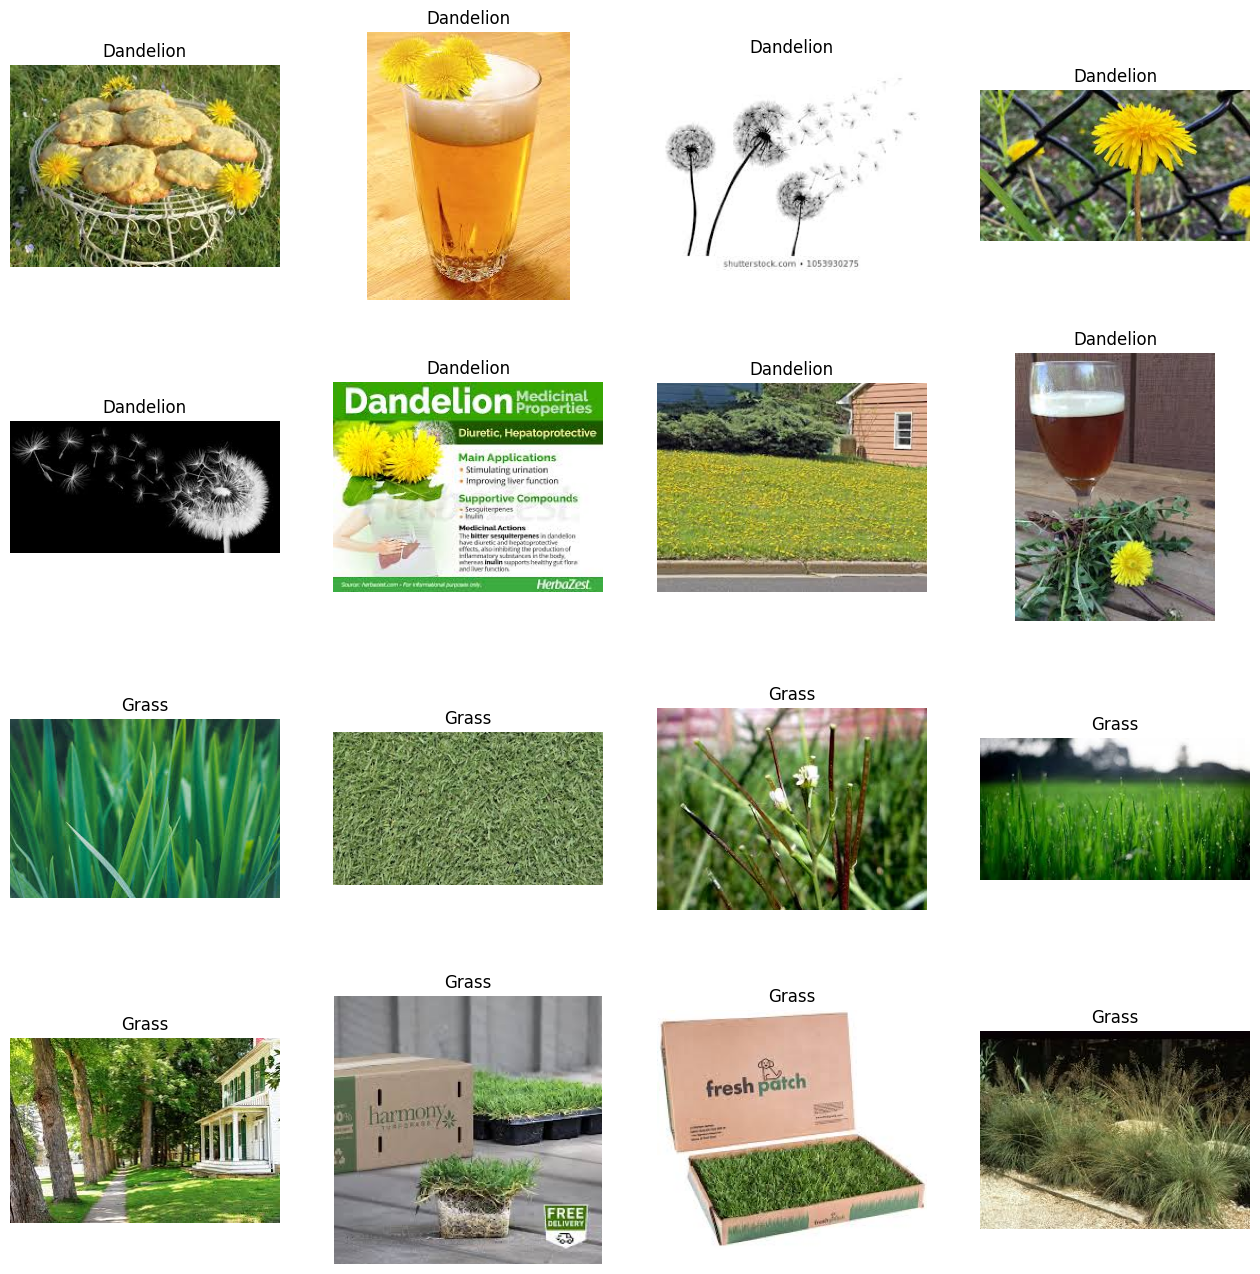

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname)
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname)
                for fname in train_grass_names[pic_index-8:pic_index]]

# complet your code
for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

  if i < len(next_dandelion_pic):
        plt.title('Dandelion')
  else:
        plt.title('Grass')

plt.show()



#### Data Preprocessing

Now, let's use `keras.preprocessing.image.ImageDataGenerator` class to create our train and validation dataset and normalize our data.

- It's important to normalize our data because data going into neural network to improve its overall performance.
- We will use the `rescale` parameter to scale our image pixel values from [0, 255] to [0,1].

- In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/valid/',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 999 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


## Building the FC-NN Model from Scratch

Step 1 will be to import tensorflow.

In [14]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp
from sklearn.metrics import roc_auc_score


**Tips:**

- First, add the first layer as Flatten layer that flattens the input image (to get 1D image data), which then feeds into the next layer,
-  Second layer: is a Dense layer (or fully-connected layer), with 256 hidden units.
- Finally, because our goal is to perform binary classification, our final layer will be a one unit of sigmoid function (activation function)  
#### Why sigmoid?


In [15]:
modelfc = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), # why 3
                                      # you may add layers ?
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The model.summary() method call prints a summary of the NN

In [16]:
modelfc.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 120000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    30,720,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,720,513 (117.19 MB)

 Trainable params: 30,720,513 (117.19 MB)

 Non-trainable params: 0 (0.00 B)

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss. We will use the `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is a sensible optimization algorithm because it automates learning-rate tuning for us (alternatively, we could also use [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) or [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) for similar results). We will add accuracy to `metrics` so that the model will monitor accuracy during training

In [17]:
modelfc.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',  # which loss function to be used ?
              metrics=['accuracy'])

### Training step (fit) -Fully Connected NN
Let's train for 15 epochs.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 8 * 120 = 960, just under our total of 999 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [18]:

history = modelfc.fit(train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_batch_size=8)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 504ms/step - accuracy: 0.5011 - loss: 71.3664 - val_accuracy: 0.6216 - val_loss: 7.7548
Epoch 2/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5167 - loss: 10.6566

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5167 - loss: 10.6566 - val_accuracy: 0.6216 - val_loss: 3.7044
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.5646 - loss: 2.0115 - val_accuracy: 0.6284 - val_loss: 0.6788
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5083 - loss: 0.6903 - val_accuracy: 0.6284 - val_loss: 0.6753
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.5076 - loss: 0.6843 - val_accuracy: 0.6486 - val_loss: 0.6620
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6250 - loss: 0.6707 - val_accuracy: 0.6622 - val_loss: 0.6507
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.5985 - loss: 0.6555 - val_accuracy: 0.6622 - val_loss: 0.6223
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5128 - loss: 0.6692 - val_accuracy: 0.6689 - val_loss: 0.6401
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.7039 - loss: 0.6428 - val_accuracy: 0.6419 - val_loss: 0.5966
Epoch 

### Evaluation of Model: Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of FC model, and plot the accuracy curve during training :

In [19]:
modelfc.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6811 - loss: 0.5255


[0.6073088645935059, 0.6824324131011963]

Now, let's plot the accuracy curve of train and valid data, and see their learning trend will be.

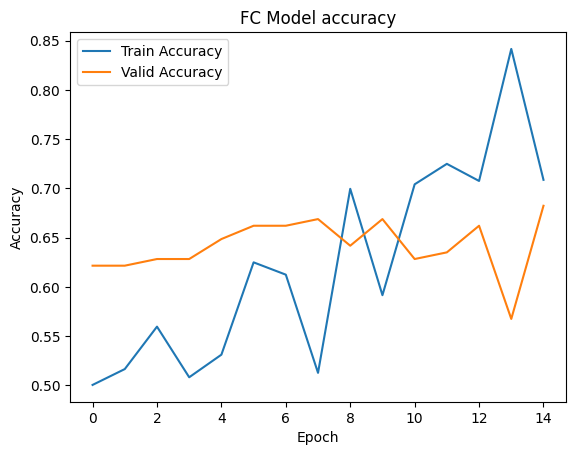

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("FC Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Valid Accuracy","Train loss","Valid Loss"])

###What are ROC and AUC

You need to evaluate the performance and validate how good (or bad) the performance of your model is,

This metric is just saying that we are calculating the **“Area Under the Curve” (AUC)** of **“Receiver Operator Characteristic” (ROC)**.

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does better than chance at classifying between dandelions and grass. Not bad!

Similarly, the AUC , as shown in the legend bottom, measures how much our model is capable of distinguishing between our two classes, dandelions and grass. The higher the AUC, the better our model is at classification. It is also used to compare different models, which I will do in future tutorials when I present how to build an image classifier using Convolutional Neural Networks and transfer learning with ResNet!


Now, let's calculate our **ROC** curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [21]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()  #it's necessary, to make prediction starting with the first batch. Because the index is on the end of queue due to fit function
preds = modelfc.predict(validation_generator,verbose=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

In [22]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [23]:
roc_auc = auc(fpr, tpr)

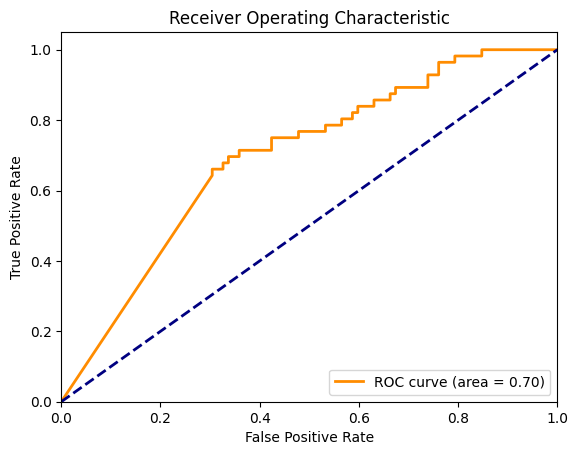

In [24]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Making Predictions on specific Files

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

Saving Dandelion.png to Dandelion.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
[0.5067274]
Dandelion.png is a grass


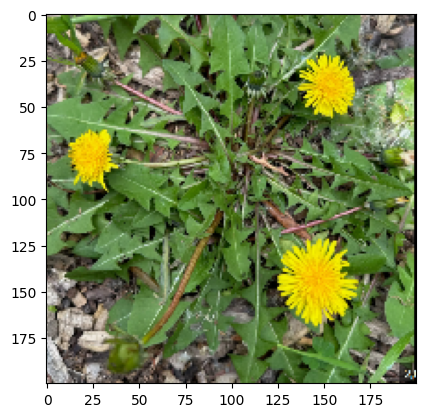

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = modelfc.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")


## Building the CNN Model from Scratch
**Tips:**

- First, add the first layer as conv2d of 16 filters of 3x3 size, and activation relu
-  Second layer: MaxPooling2D layer
- repeat this block of layers, increasing number of filters (32, 64), following each time by a MaxPooling2D layer
- add a flatten layer to prepare 2D feature maps to be ready for FC layer
- add a Dense layer with 512 units
- Finally, add a Dense layer with **x units ???**




In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3))),
model.add(layers.MaxPooling2D(2, 2)),
# The second convolution
model.add(layers.Conv2D(32, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
# The third convolution
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
# The fourth convolution
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
# # The fifth convolution
model.add(layers.Conv2D(64, (3,3), activation='relu')),
model.add(layers.MaxPooling2D(2,2)),
# Flatten the results to feed into a DNN
model.add(layers.Flatten()),
# 512 neuron hidden layer
model.add(layers.Dense(512, activation='relu')),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
num_classes = 1
model.add(layers.Dense(num_classes, activation='sigmoid'))  # the Num of output ?

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
metrics=['accuracy']
                 )

In [28]:
history = model.fit(train_generator,
steps_per_epoch=8,
epochs=15,
verbose=1,
validation_data = validation_generator,
validation_batch_size=8)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 493ms/step - accuracy: 0.5533 - loss: 0.7175 - val_accuracy: 0.7162 - val_loss: 0.6738
Epoch 2/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6667 - loss: 0.6796

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6667 - loss: 0.6796 - val_accuracy: 0.3784 - val_loss: 0.7357
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.5645 - loss: 0.6852 - val_accuracy: 0.6892 - val_loss: 0.6660
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6500 - loss: 0.6668 - val_accuracy: 0.5203 - val_loss: 0.6916
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - accuracy: 0.6170 - loss: 0.6475 - val_accuracy: 0.6892 - val_loss: 0.6377
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7583 - loss: 0.6090 - val_accuracy: 0.6757 - val_loss: 0.5938
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.6358 - loss: 0.6224 - val_accuracy: 0.7365 - val_loss: 0.5221
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6333 - loss: 0.5752 - val_accuracy: 0.5135 - val_loss: 0.7624
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.7489 - loss: 0.5028 - val_accuracy: 0.6892 - val_loss: 0.6398
Epoch 1

### Evaluation of Model: Accuracy, ROC Curve, and AUC





In [29]:
model.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7502 - loss: 0.5911


[0.588640570640564, 0.7094594836235046]

**Exercise**

Plot the curves of accuracy and of loss for train and validation data

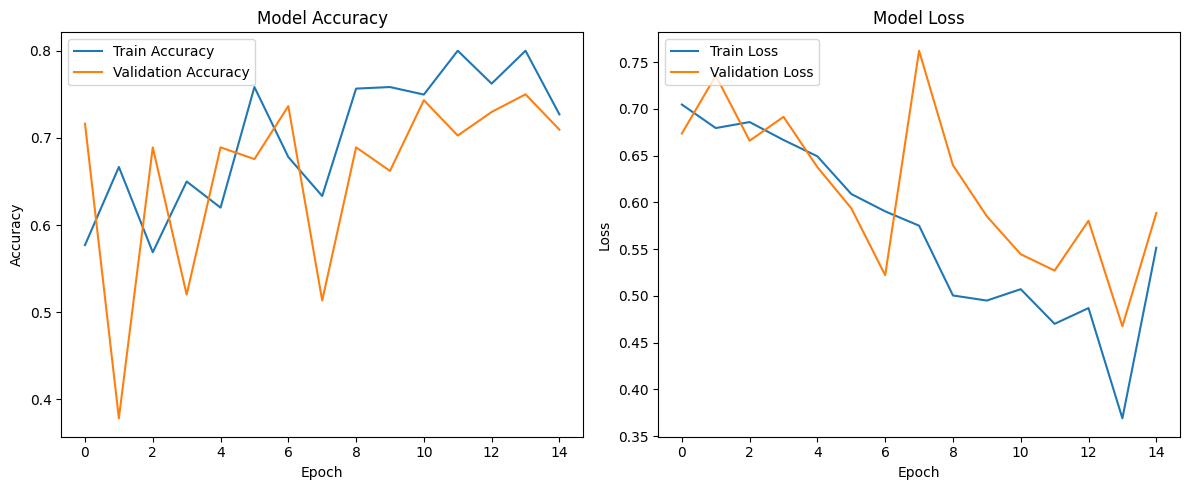

In [30]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
#your code here

In [31]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds2 = model.predict(validation_generator,
                      verbose=1)



7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step


In [32]:
fpr_cnn, tpr_cnn, _ = roc_curve(validation_generator.classes, preds2)

In [33]:
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

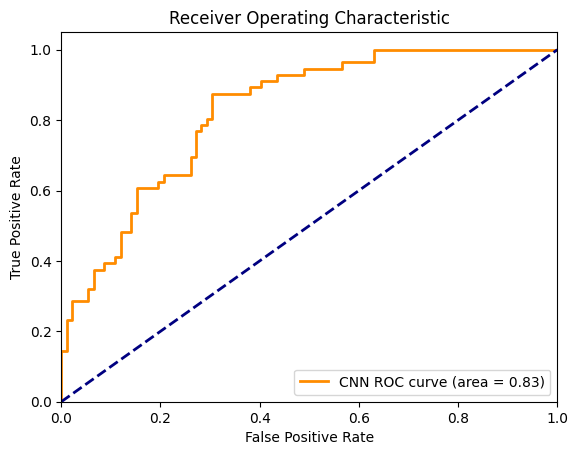

In [34]:
plt.figure()
lw = 2
plt.plot(fpr_cnn, tpr_cnn, color='darkorange',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Making Predictions on specific Files

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

Saving Dandelion.png to Dandelion (1).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
[0.]
Dandelion (1).png is a dandelion


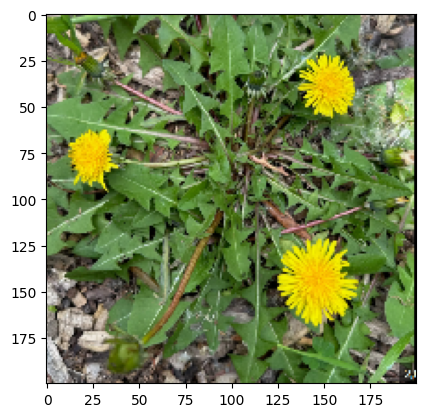

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a dandelion")
  else:
    print(fn + " is a grass")


### **Compare two Models**

**Exercise**
Evaluation of two models within a single plot: ROC Curve for each


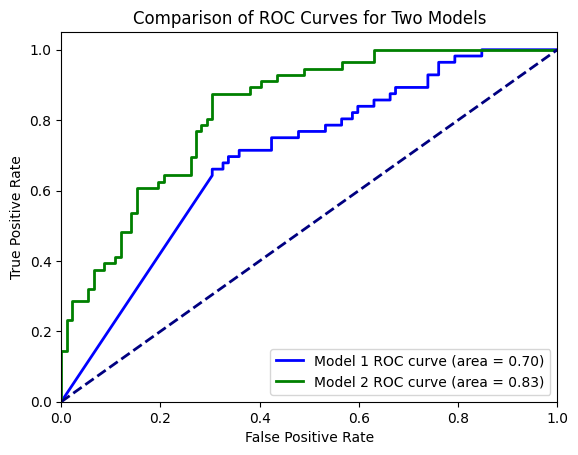

In [36]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Model 1 ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_cnn, tpr_cnn, color='green', lw=2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc_cnn)

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves for Two Models')
plt.legend(loc="lower right")

plt.show()

1. Compare between the performances of two models, with regard to
accuracy, ROC, and complexity
Ans:-
*   If both models have similar accuracy levels, Model 2 might be preferred given its higher ROC-AUC score, suggesting a more reliable performance in varied threshold conditions
*   Model 1 has an ROC-AUC of 0.73, while Model 2 has a slightly higher ROC-AUC of 0.75
*   Model 2's marginally better ROC-AUC score (0.75 vs. 0.73) might not justify the added complexity if simplicity and lower resource demands are desired.


2. Can you suggest another measurement of performance ?
Ans:-
*   Confusion Matrix
*   F1-Score


3. Which measurment do you suggest to undeststand better the model's performance ?
Ans:-
Precision-Recall Curves are especially valuable when dealing with imbalanced datasets. While ROC curves can sometimes give an overly optimistic view on imbalanced data, PR curves focus directly on the ability to identify positive cases.

AUC-PR (Area Under the Precision-Recall Curve) provides a single metric summarizing the model’s precision-recall trade-off, helping to compare models based on their effectiveness in predicting positive cases.






